In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from numpy.core.numeric import ones_like
from numpy.core.numeric import zeros_like
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, RandomForestClassifier, ExtraTreesClassifier

import itertools

from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, cross_val_score

from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import SGDRegressor, BayesianRidge
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import make_scorer, confusion_matrix
from sklearn.dummy import DummyRegressor, DummyClassifier

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv("ihdp.csv")

In [4]:
df.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,t,yf,ycf,ite
0,1.397395,0.996346,-1.105624,-0.879606,0.308569,-1.023402,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,4.771232,-0.298509,4.657928
1,0.269033,0.196818,0.383828,0.161703,-0.629189,1.460832,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.956273,5.783770,3.428604
2,1.051537,1.795874,-1.105624,0.161703,-0.629189,0.963985,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.164164,7.055789,3.658195
3,0.662446,0.196818,-0.733261,-0.879606,0.371086,-0.692171,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,6.172307,1.379697,4.585505
4,0.856992,1.795874,0.011465,-0.879606,0.558638,0.301522,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,7.834469,2.747986,4.265591


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 747 entries, 0 to 746
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      747 non-null    float64
 1   x2      747 non-null    float64
 2   x3      747 non-null    float64
 3   x4      747 non-null    float64
 4   x5      747 non-null    float64
 5   x6      747 non-null    float64
 6   x7      747 non-null    float64
 7   x8      747 non-null    float64
 8   x9      747 non-null    float64
 9   x10     747 non-null    float64
 10  x11     747 non-null    float64
 11  x12     747 non-null    float64
 12  x13     747 non-null    float64
 13  x14     747 non-null    float64
 14  x15     747 non-null    float64
 15  x16     747 non-null    float64
 16  x17     747 non-null    float64
 17  x18     747 non-null    float64
 18  x19     747 non-null    float64
 19  x20     747 non-null    float64
 20  x21     747 non-null    float64
 21  x22     747 non-null    float64
 22  x2

In [6]:
df.describe()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,t,yf,ycf,ite
count,7.470000e+02,7.470000e+02,7.470000e+02,7.470000e+02,7.470000e+02,7.470000e+02,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000
mean,3.626431e-17,2.348263e-17,-4.666801e-17,-9.012574e-16,4.518177e-17,-7.251376e-16,0.514056,0.093708,0.520750,0.364123,0.269076,0.219545,0.358768,0.463186,0.140562,0.959839,0.594378,0.963855,0.135207,0.135207,0.156627,0.081660,0.073628,0.128514,0.157965,0.186078,3.159538,5.696107,4.016067
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.500137,0.291618,0.499904,0.481506,0.443777,0.414216,0.479960,0.498977,0.347802,0.196467,0.491341,0.186775,0.342174,0.342174,0.363692,0.274029,0.261339,0.334886,0.364953,0.389430,2.179956,1.980121,0.859736
min,-2.731287e+00,-3.800823e+00,-1.850350e+00,-8.796060e-01,-5.130428e+00,-1.851480e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.543902,-1.037628,-1.866989
25%,-6.669461e-01,-6.027100e-01,-7.332610e-01,-8.796060e-01,-5.666720e-01,-8.577868e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.626779,5.053598,3.775936
50%,1.652752e-01,1.968181e-01,-3.608980e-01,1.617025e-01,1.210172e-01,-2.970882e-02,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.577294,6.209686,4.304433
75%,8.137593e-01,5.965822e-01,7.561910e-01,1.617025e-01,6.836721e-01,6.327536e-01,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.494637,6.948922,4.569454
max,1.505476e+00,2.595403e+00,2.990369e+00,2.244320e+00,2.371637e+00,2.951372e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,11.268228,10.171004,4.670125


In [7]:
df.isnull().sum().sum()

0

In [8]:
df.columns

Index(['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11',
       'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20', 'x21',
       'x22', 'x23', 'x24', 'x25', 't', 'yf', 'ycf', 'ite'],
      dtype='object')

In [9]:
from econml.metalearners import XLearner
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt

In [10]:
X = df.iloc[:,:-4]

In [11]:
X.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25
0,1.397395,0.996346,-1.105624,-0.879606,0.308569,-1.023402,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.269033,0.196818,0.383828,0.161703,-0.629189,1.460832,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.051537,1.795874,-1.105624,0.161703,-0.629189,0.963985,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.662446,0.196818,-0.733261,-0.879606,0.371086,-0.692171,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.856992,1.795874,0.011465,-0.879606,0.558638,0.301522,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
T = df.iloc[:,-4].values
T

array([1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0.,
       1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0.,
       0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0.

In [13]:
T = np.reshape(T,(-1, 1))

In [14]:
T.shape


The to_png function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.

The to_rgba function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.

The to_mask function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.

The MathtextBackendBitmap class was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.


In [15]:
Y = df.iloc[:,-3]

In [16]:
ITE = df.iloc[:,-1]

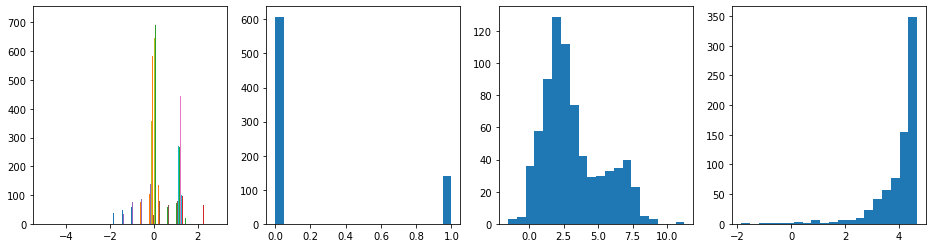

In [17]:
bins=20
fig, axs = plt.subplots(1, 4, figsize=(16, 4))
axs[0].hist(X, bins=bins)
axs[1].hist(T, bins=bins)
axs[2].hist(Y, bins=bins)
axs[3].hist(ITE, bins=bins)
plt.show()

In [18]:
np.mean(ITE)

In [19]:
# limit = 100
# plt.scatter(X[T == 1][:limit], Y[T == 1][:limit], c = "r", label = "Treated")
# plt.scatter(X[T == 0][:limit], Y[T == 0][:limit], c = "g", label = "Control")
# plt.legend(ncol=2)

In [20]:
X.shape

In [21]:
Y.shape

In [22]:
T.shape

In [23]:
x_train, x_test, t_train, t_test, y_train, y_test, ite_train, ite_test = train_test_split(X,T,Y,ITE, test_size=0.2, random_state=50)

In [24]:
t_train.shape

In [25]:
x_train.shape

# Random Forest

In [26]:
clf = RandomForestRegressor(100)

In [27]:
# the x and the treatment concatenated
xt_train= np.concatenate([x_train,t_train], axis=1)

In [28]:
x_train.shape

In [29]:
xt_train.shape

In [30]:
clf.fit(xt_train,y_train)

RandomForestRegressor()

In [31]:
# concatenating confounders with an array of tratment equals to zero
xt0_test = np.concatenate([x_test, np.zeros_like(t_test)], axis=1)

In [32]:
rf_y0_test = clf.predict(xt0_test)

In [33]:
xt0_test

array([[-0.48320893,  0.19681812, -0.36089799, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.87860773,  1.39611031, -0.36089799, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.31093048,  1.39611031, -1.47798693, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.22381528,  0.19681812, -0.36089799, ...,  0.        ,
         0.        ,  0.        ],
       [-0.28866369,  0.19681812, -0.73326097, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.31658816,  0.19681812, -0.73326097, ...,  0.        ,
         1.        ,  0.        ]])

In [35]:
# concatenating confounders with an array of tratment equals to one
xt1_test = np.concatenate([x_test, np.ones_like(t_test)], axis=1)

In [36]:
rf_y1_test = clf.predict(xt1_test)

In [37]:
# computing predicted ite

In [38]:
rf_ite_test = rf_y1_test - rf_y0_test

In [39]:
rf_ite_test.shape


The to_png function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.

The to_rgba function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.

The to_mask function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.

The MathtextBackendBitmap class was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.


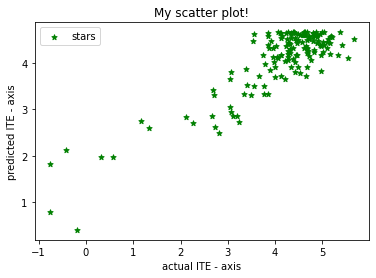

In [176]:
# plotting points as a scatter plot
plt.scatter(rf_ite_test, ite_test, label= "stars", color= "green",
            marker= "*", s=30)
 
# x-axis label
plt.xlabel('actual ITE - axis')
# frequency label
plt.ylabel('predicted ITE - axis')
# plot title
plt.title('My scatter plot!')
# showing legend
plt.legend()
 
# function to show the plot
plt.show()

In [40]:
# showing the actual and the predicted ITE
cf = pd.DataFrame({'Actual':ite_test , 'Predicted': rf_ite_test})
cf

,Actual,Predicted
536,4.670125,4.640111
387,4.335205,4.672645
625,4.163558,4.716057
549,4.304433,4.680277
407,4.635409,3.562631
...,...,...
323,4.644078,4.798505
23,4.457784,4.560970
315,4.670125,4.996991
188,4.336900,3.863069


In [41]:
np.sort(cf)

array([[ 4.64011118,  4.67012464],
       [ 4.33520458,  4.67264534],
       [ 4.16355777,  4.71605736],
       [ 4.3044335 ,  4.68027682],
       [ 3.56263121,  4.63540929],
       [ 4.18203264,  4.96890442],
       [ 4.42252223,  4.55108091],
       [ 4.39930885,  4.66719402],
       [ 4.61143145,  4.85016421],
       [ 4.14395312,  4.59824598],
       [ 3.71830237,  4.65855383],
       [ 4.32052845,  4.42505131],
       [ 4.0617548 ,  4.12376336],
       [ 3.70706728,  4.00783615],
       [ 4.56945397,  5.15185322],
       [ 3.05560645,  3.06259932],
       [ 4.6005372 ,  4.63552263],
       [ 4.22584704,  4.30904417],
       [ 4.24917575,  4.82409114],
       [ 4.56945397,  5.20891564],
       [ 4.26555377,  4.67012464],
       [ 4.56945397,  4.89302443],
       [ 4.58180187,  4.61347703],
       [ 0.57948845,  1.96601287],
       [ 2.85955913,  3.19465374],
       [ 4.53091834,  4.71800423],
       [ 4.17648947,  4.46022546],
       [ 3.95862427,  4.33253539],
       [-0.76420993,

# T-learner

In [42]:
#T-Learner
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
m0 = LinearRegression()
m1 = LinearRegression()
t0_idx = (t_train == 0).flatten()
t1_idx = (t_train == 1).flatten()
# train on control units
m0.fit(x_train[t0_idx], y_train[t0_idx])
# train on treated units
m1.fit(x_train[t1_idx], y_train[t1_idx])
y0_pred = m0.predict(x_test)
y1_pred = m1.predict(x_test)
effect_pred = y1_pred - y0_pred


In [43]:
# showing the actual and the predicted ITE
pd.set_option('display.max_columns', None)
tf = pd.DataFrame({'Actual':ite_test , 'Predicted': effect_pred})
np.sort(tf)

array([[4.67012464, 5.47795968],
       [4.20430057, 4.33520458],
       [3.79783962, 4.16355777],
       [4.3044335 , 4.42628572],
       [4.40918726, 4.63540929],
       [3.404913  , 4.18203264],
       [4.50934797, 4.55108091],
       [4.66719402, 5.39219946],
       [4.61143145, 5.8966982 ],
       [3.9930378 , 4.59824598],
       [3.71830237, 4.19845571],
       [3.33774354, 4.42505131],
       [3.60254551, 4.12376336],
       [3.62803051, 3.70706728],
       [4.28712172, 4.56945397],
       [2.18434715, 3.06259932],
       [4.6005372 , 5.17363866],
       [4.22584704, 4.56443351],
       [4.13601811, 4.24917575],
       [4.56945397, 4.8868925 ],
       [4.67012464, 5.42952122],
       [4.56945397, 5.1361618 ],
       [4.61347703, 4.6893907 ],
       [1.45557286, 1.96601287],
       [2.78328113, 2.85955913],
       [3.77079814, 4.53091834],
       [4.17648947, 4.2234597 ],
       [3.43188194, 4.33253539],
       [1.83204734, 2.5263108 ],
       [3.93102349, 4.06753864],
       [4.

## X-Learner

In [44]:
# X-Learner
xl = XLearner(models=RandomForestRegressor(), propensity_model=RandomForestClassifier())
xl.fit(y_train, t_train.flatten(), X=x_train)

xl_ite_test = xl.effect(x_test)

In [45]:
# showing the actual and the predicted ITE
pd.set_option('display.max_columns', None)
xf = pd.DataFrame({'Actual':ite_test , 'Predicted': xl_ite_test})
np.sort(xf)

array([[4.67012464, 5.10817766],
       [4.33520458, 4.35046183],
       [4.14152586, 4.16355777],
       [4.3044335 , 4.41250418],
       [4.24093318, 4.63540929],
       [4.18203264, 4.50536283],
       [4.09773505, 4.55108091],
       [4.66719402, 4.91841479],
       [4.61143145, 4.77232191],
       [4.02560435, 4.59824598],
       [3.71830237, 4.44592402],
       [3.95454938, 4.42505131],
       [4.07339678, 4.12376336],
       [3.70706728, 4.16736019],
       [4.56945397, 4.62348829],
       [3.06259932, 3.23622525],
       [4.6005372 , 4.7537714 ],
       [4.11374684, 4.22584704],
       [4.24917575, 4.4200814 ],
       [4.56945397, 4.57365734],
       [4.67012464, 4.79575184],
       [4.56945397, 4.8306826 ],
       [4.54869845, 4.61347703],
       [1.96601287, 2.00634241],
       [2.84668352, 2.85955913],
       [4.25186106, 4.53091834],
       [4.00217373, 4.17648947],
       [4.33253539, 4.48026423],
       [1.83204734, 2.13860703],
       [4.06753864, 4.1889983 ],
       [4.

# Metrics

In [46]:
def abs_ate(effect_true, effect_pred):
    """
    Absolute error for the Average Treatment Effect (ATE)
    :param effect_true: true treatment effect value
    :param effect_pred: predicted treatment effect value
    :return: absolute error on ATE
    """
    return np.abs(np.mean(effect_true)-np.mean(effect_pred))
  

def pehe(effect_true, effect_pred):
    """
    Precision in Estimating the Heterogeneous Treatment Effect (PEHE)
    :param effect_true: true treatment effect value
    :param effect_pred: predicted treatment effect value
    :return: PEHE
    """
    return np.sqrt(np.mean((effect_true-effect_pred)**2))
  

    

## Absolute error on ATE

In [47]:
## Absolute error on ATE for Random Forrest
rf_ate_test = abs_ate(ite_test,rf_ite_test )
rf_ate_test


The to_png function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.

The to_rgba function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.

The to_mask function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.

The MathtextBackendBitmap class was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.


In [48]:
## Absolute error on ATE for X-Learner
xl_ate_test = abs_ate(ite_test, xl_ite_test)
xl_ate_test

## Absolute error on PEHE

In [49]:
## Absolute error on PEHE for Random Forrest
rf_pehe_test = pehe(ite_test,rf_ite_test)
rf_pehe_test

In [50]:
## Absolute error on PEHE for X-LEARNER
xl_pehe_test = pehe(ite_test,xl_ite_test)
xl_pehe_test

## Hyperparameter optimisation

In [51]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import precision_score as precision
from sklearn.metrics import recall_score as recall
from sklearn.metrics import f1_score as f1
from sklearn.model_selection import  GridSearchCV
from sklearn.model_selection import  cross_val_score

In [52]:
clf = RandomForestRegressor()

In [53]:
scoring_list = ['neg_mean_squared_error', 'r2']

In [55]:
#function to get the best parameter
def get_best_params(scoring):
    clf = RandomForestRegressor()
    param_grid = { 
    'n_estimators': [100, 500, 1000],
    'max_depth' : [2,8,10]
    }
    clf = GridSearchCV(clf, param_grid, n_jobs = -1, cv = 10, scoring = scoring)
    clf.fit(xt_train, y_train)
    return clf.best_params_

In [56]:
print(get_best_params('neg_mean_squared_error'))

{'max_depth': 8, 'n_estimators': 100}


In [57]:
print(get_best_params('r2'))

{'max_depth': 8, 'n_estimators': 500}


In [58]:
clf = RandomForestRegressor(n_estimators=500, max_depth=8)

In [59]:
scoring_list = ['neg_mean_squared_error', 'r2']

In [60]:
scores = cross_validate(clf, x_train, y_train, cv=10, scoring = scoring_list)

In [61]:
print("MSE: %.8f +/- %.8f" % (scores['test_neg_mean_squared_error'].mean(), scores['test_neg_mean_squared_error'].std()))
print("R2: %.8f +/- %.8f" % (scores['test_r2'].mean(), scores['test_r2'].std()))

MSE: -3.49937854 +/- 0.86219180
R2: 0.23584040 +/- 0.09863525


In [62]:
#showing the scres
ff = pd.DataFrame(scores)
ff

,fit_time,score_time,test_neg_mean_squared_error,test_r2
0,1.838543,0.030895,-3.314413,0.230809
1,1.402060,0.072094,-2.182180,0.321901
2,1.616194,0.028663,-4.618690,0.169373
3,1.849955,0.057399,-3.032252,0.369673
4,1.810279,0.067638,-3.270296,0.392533
5,1.940043,0.032030,-4.127612,0.178127
6,2.040207,0.074211,-2.465282,0.123945
7,1.862987,0.050820,-4.517772,0.275004
8,1.744140,0.064485,-4.607571,0.076616
9,1.713385,0.069041,-2.857717,0.220423


In [90]:
results = []
results.append(['RF', rf_ate_test, rf_pehe_test])
results.append(['XL', xl_ate_test, xl_pehe_test])

cols = ['Method', 'ATE test', 'PEHE test']

df = pd.DataFrame(results, columns=cols)
df

,Method,ATE test,PEHE test
0,RF,0.027181,0.616837
1,XL,0.010570,0.390378


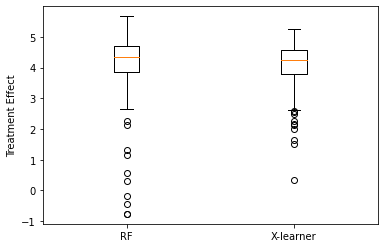

In [67]:
plt.figure()
plt.boxplot([rf_ite_test, xl_ite_test.flatten()], labels=['RF', 'X-learner'])
plt.ylabel('Treatment Effect')

plt.show()

In [68]:
# Fit the model
clf.fit(xt_train, y_train)

# Let's see the feature importances for our classifier
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

In [69]:
print(indices)

[25  5  0 14  4  3  2  1 11  6 12 10 23 13  7 24  8 16 20 19 18  9 15 17
 21 22]


# Propensity score re-weighting

In [70]:
# calculating for the weight
def get_ps_weights(clf, x, t):
    
    ti = np.squeeze(t)
    clf.fit(x, ti)
    ptx = clf.predict_proba(x).T[1].T + 0.0002 # add a small value to avoid dividing by 0  
    wi = (ti/ptx)+((1-ti)/(1-ptx))
    return wi

In [71]:
# Get the sample weights
prop_clf = RandomForestClassifier()
weights = get_ps_weights(prop_clf, x_train, t_train)

# Train the regressor
rf_ipsw = RandomForestRegressor()

rf_ipsw.fit(xt_train, y_train, sample_weight=weights)

# Make predictions
rf_ipsw_y0_test = rf_ipsw.predict(xt0_test)

rf_ipsw_y1_test = rf_ipsw.predict(xt1_test)


# Compute ITEs
rf_ipsw_te_test = rf_ipsw_y1_test - rf_ipsw_y0_test

In [87]:
## Absolute error on ATE for IPSW
rf_ipsw_ate_test = abs_ate(ite_test,rf_ipsw_te_test )
rf_ipsw_ate_test


The to_png function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.

The to_rgba function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.

The to_mask function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.

The MathtextBackendBitmap class was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.


In [88]:
## Absolute error on PEHE for IPSW
rf_ipsw_pehe_test = pehe(ite_test,rf_ipsw_te_test)
rf_ipsw_pehe_test

In [72]:
clf = RandomForestRegressor()

In [73]:
scoring_list = ['neg_mean_squared_error', 'r2']

In [74]:
# Getting the best parameter
def get_best_parameter(scoring):
    clf = RandomForestRegressor()
    param_grid = { 
    'n_estimators': [100, 500, 1000],
    'max_depth' : [2,8,10]
    }
    clf = GridSearchCV(clf, param_grid, n_jobs = -1, cv = 10, scoring = scoring)
    clf.fit(xt_train, y_train, sample_weight=weights)
    return clf.best_params_

In [81]:
print(get_best_parameter('neg_mean_squared_error'))

{'max_depth': 8, 'n_estimators': 100}


In [76]:
print(get_best_parameter('r2'))

{'max_depth': 8, 'n_estimators': 500}


In [118]:
clf = RandomForestRegressor(n_estimators=500, max_depth=8)

In [119]:
scoring_list = ['neg_mean_squared_error', 'r2']

In [120]:
scores = cross_validate(clf, x_train, y_train, cv=10, scoring = scoring_list)

In [121]:
print("MSE: %.8f +/- %.8f" % (scores['test_neg_mean_squared_error'].mean(), scores['test_neg_mean_squared_error'].std()))
print("R2: %.8f +/- %.8f" % (scores['test_r2'].mean(), scores['test_r2'].std()))

MSE: -3.49624786 +/- 0.83856548
R2: 0.23467629 +/- 0.10027857


In [158]:
# getting the score
sc = pd.DataFrame(scores)
sc

,fit_time,score_time,test_neg_mean_squared_error,test_r2
0,2.446213,0.052572,-3.368445,0.218270
1,2.469194,0.078532,-2.265770,0.295926
2,2.374730,0.080131,-4.623723,0.168467
3,1.844838,0.038523,-3.045946,0.366827
4,1.576983,0.052582,-3.191798,0.407114
5,1.906571,0.071754,-4.082069,0.187195
6,1.996073,0.082900,-2.517418,0.105418
7,2.220693,0.067543,-4.476072,0.281696
8,2.063588,0.067744,-4.588368,0.080464
9,2.005139,0.062648,-2.802870,0.235385


In [122]:
results = []
results.append(['RF', rf_ate_test, rf_pehe_test])
results.append(['RF (IPW)', rf_ipsw_ate_test, rf_ipsw_pehe_test])
results.append(['XL', xl_ate_test, xl_pehe_test])

cols = ['Method', 'ATE test', 'PEHE test']

df = pd.DataFrame(results, columns=cols)
df

,Method,ATE test,PEHE test
0,RF,0.027181,0.616837
1,RF (IPW),0.019952,0.620399
2,XL,0.010570,0.390378


,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25
0,1.397395,0.996346,-1.105624,-0.879606,0.308569,-1.023402,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.269033,0.196818,0.383828,0.161703,-0.629189,1.460832,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.051537,1.795874,-1.105624,0.161703,-0.629189,0.963985,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.662446,0.196818,-0.733261,-0.879606,0.371086,-0.692171,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.856992,1.795874,0.011465,-0.879606,0.558638,0.301522,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
742,-1.853672,-2.201766,1.500917,0.161703,-0.129052,-1.023402,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
743,-1.066845,-1.402238,1.128554,2.244320,0.371086,2.288910,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
744,-1.045229,-1.337276,1.128554,-0.879606,0.683672,0.301522,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
745,-0.115735,-0.602710,-1.105624,2.244320,0.558638,2.785756,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


# feature important

In [141]:
from sklearn.inspection import permutation_importance
from matplotlib import pyplot as plt

In [142]:
rf = RandomForestRegressor(n_estimators=500, max_depth=8)

In [143]:
rf.fit(xt_train,y_train)

RandomForestRegressor(max_depth=8, n_estimators=500)

In [144]:
sort = rf.feature_importances_.argsort()

In [145]:
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

In [146]:
print (indices)

[25  5 14  0  4  3  1  2 11  6 12 10 24 23  8  7 13 16 20 19 15  9 18 17
 21 22]


Text(0.5, 0, 'FEATURE IMPORTANCES')

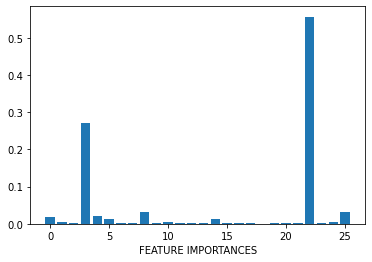

In [147]:
plt.bar(indices[sort], rf.feature_importances_[sort])
plt.xlabel("FEATURE IMPORTANCES")

# CATE

In [179]:
from causalinference import CausalModel
from econml.dml import CausalForestDML 

In [180]:
est_nonparam = CausalForestDML(model_y=GradientBoostingRegressor(), model_t=GradientBoostingRegressor())

In [211]:
Y = np.reshape(Y,(-1, 1))
Y.shape

In [212]:
Y=Y.ravel()

In [213]:
est_nonparam_dw = est_nonparam.dowhy.fit(Y, T, X=X )

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
